In [1]:
import tensorflow
import keras

In [2]:
import numpy as np

In [3]:
from keras import models
from keras import layers

In [4]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [5]:
print(train_images.ndim)
print((train_images.shape))
print(train_images.dtype)

3
(60000, 28, 28)
uint8


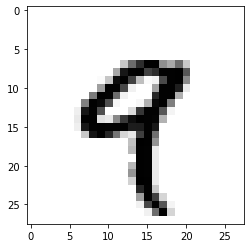

In [6]:
digit = train_images[4]
import matplotlib.pyplot as plt
plt.imshow(digit, cmap = plt.cm.binary)
plt.show()

In [7]:
#tensor slicing
print(train_images[10:100].shape)
print(train_images[10:100,:,:].shape)
#note axis 0 is called samples axis/sample dimension or batch axis/batch dimension

#Note, that by definition a batch of 1000 grayscale images of 256 * 256 have shape
(1000, 256, 256, 1)
#The same thing for a color image
(1000, 256, 256, 3)
#So tensorflow uses the (samples, height, width, color_depth) format

(90, 28, 28)
(90, 28, 28)


(1000, 256, 256, 3)

In [8]:
model = models.Sequential()
model.add(layers.Dense(512, activation = 'relu', input_shape = (784,)))
model.add(layers.Dense(10, activation = 'softmax'))

In [9]:
model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy']  )
train_images = train_images.reshape((60000, 28*28))
train_images = train_images.astype('float32')/255.

test_images = test_images.reshape((10000, 28*28))
test_images = test_images.astype('float32')/255.




In [10]:
#for one hot encoding
from keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [11]:
model.fit(train_images, train_labels, epochs = 5, batch_size = 128)

Epoch 1/5
469/469 [==============================] - 5s 9ms/step - loss: 0.4327 - accuracy: 0.8732
Epoch 2/5
469/469 [==============================] - 4s 9ms/step - loss: 0.1131 - accuracy: 0.9669
Epoch 3/5
469/469 [==============================] - 4s 9ms/step - loss: 0.0702 - accuracy: 0.9789
Epoch 4/5
469/469 [==============================] - 4s 9ms/step - loss: 0.0502 - accuracy: 0.9845
Epoch 5/5
469/469 [==============================] - 4s 9ms/step - loss: 0.0349 - accuracy: 0.9890


In [12]:
Test_loss, test_acc = model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.0736 - accuracy: 0.9779


In [13]:
print(test_acc)

0.9779000282287598


In [14]:
type(train_images)

numpy.ndarray

Approach for the same problem using Convolutional Neural Networks:


In [15]:
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3), activation = 'relu', input_shape = (28,28,1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3), activation = 'relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(10, activation = 'softmax'))
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)               

In [16]:
from keras.datasets import mnist
from keras.utils import to_categorical

In [17]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=5, batch_size=64)

Epoch 1/5
938/938 [==============================] - 48s 50ms/step - loss: 0.4078 - accuracy: 0.8737
Epoch 2/5
938/938 [==============================] - 47s 50ms/step - loss: 0.0505 - accuracy: 0.9842
Epoch 3/5
938/938 [==============================] - 47s 50ms/step - loss: 0.0332 - accuracy: 0.9899
Epoch 4/5
938/938 [==============================] - 46s 49ms/step - loss: 0.0243 - accuracy: 0.9927
Epoch 5/5
938/938 [==============================] - 46s 49ms/step - loss: 0.0205 - accuracy: 0.9938


In [18]:
Test_loss, test_acc = model.evaluate(test_images, test_labels)

313/313 [==============================] - 3s 9ms/step - loss: 0.0346 - accuracy: 0.9897


IMPROVEMENT IN THE TEST ACCURACY

In [19]:
test_acc

0.9897000193595886